<div>
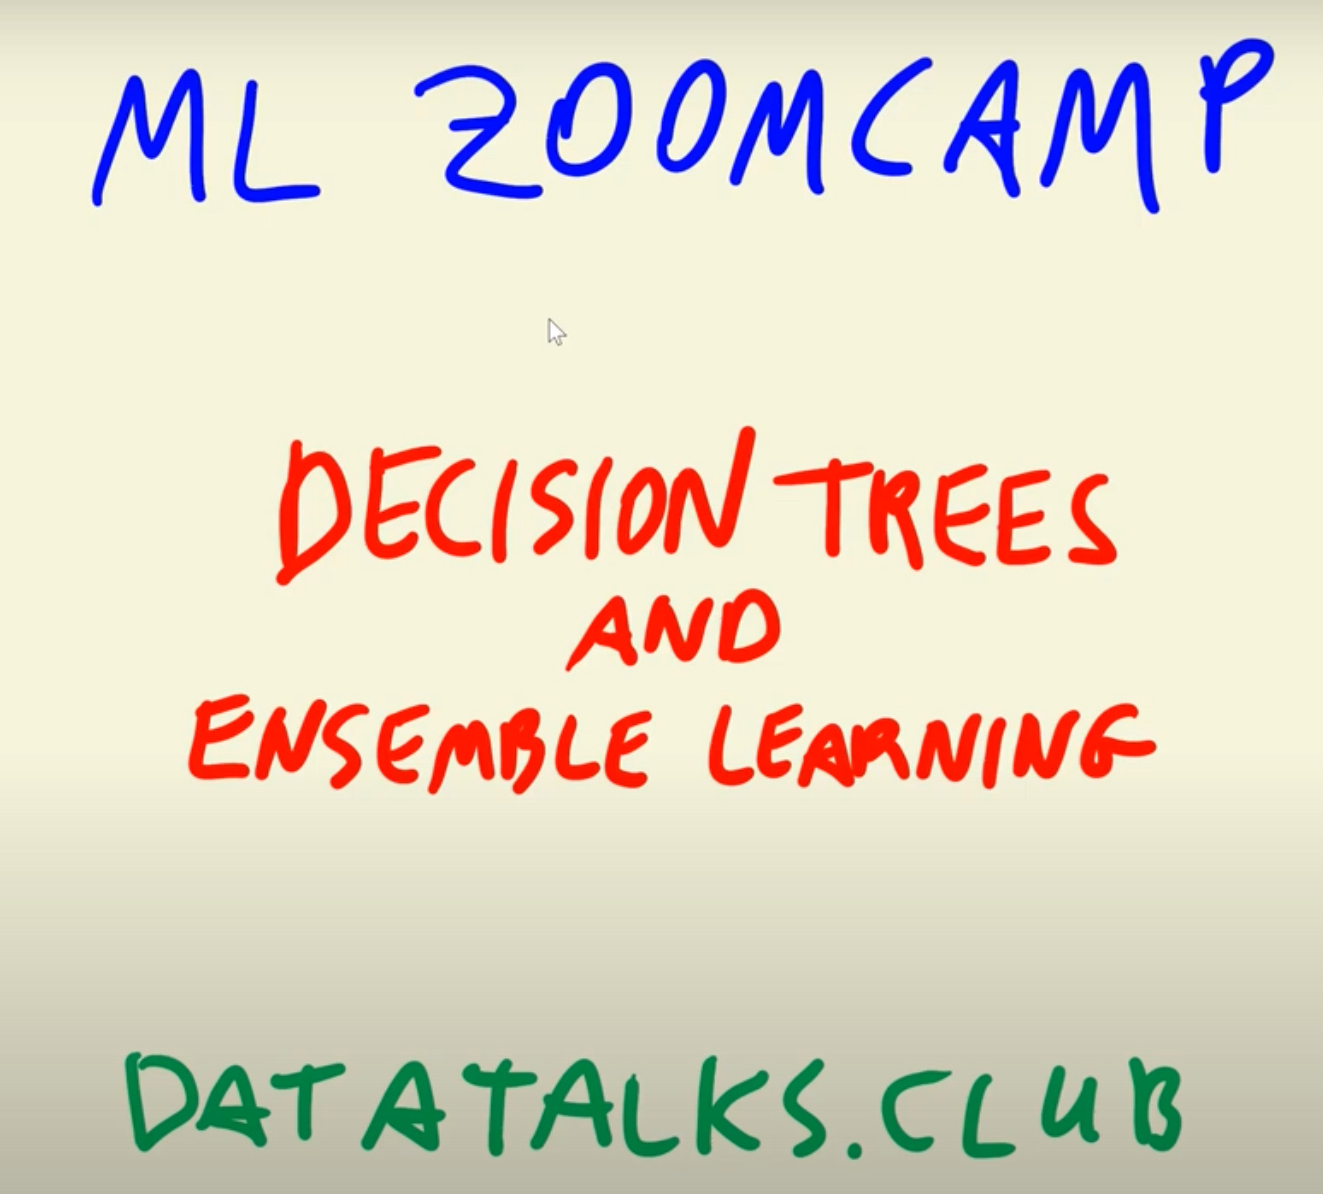
</div>

### 6.1 Credit risk scoring

We will build a model to help the bank to decide to give credit or not

<div>
    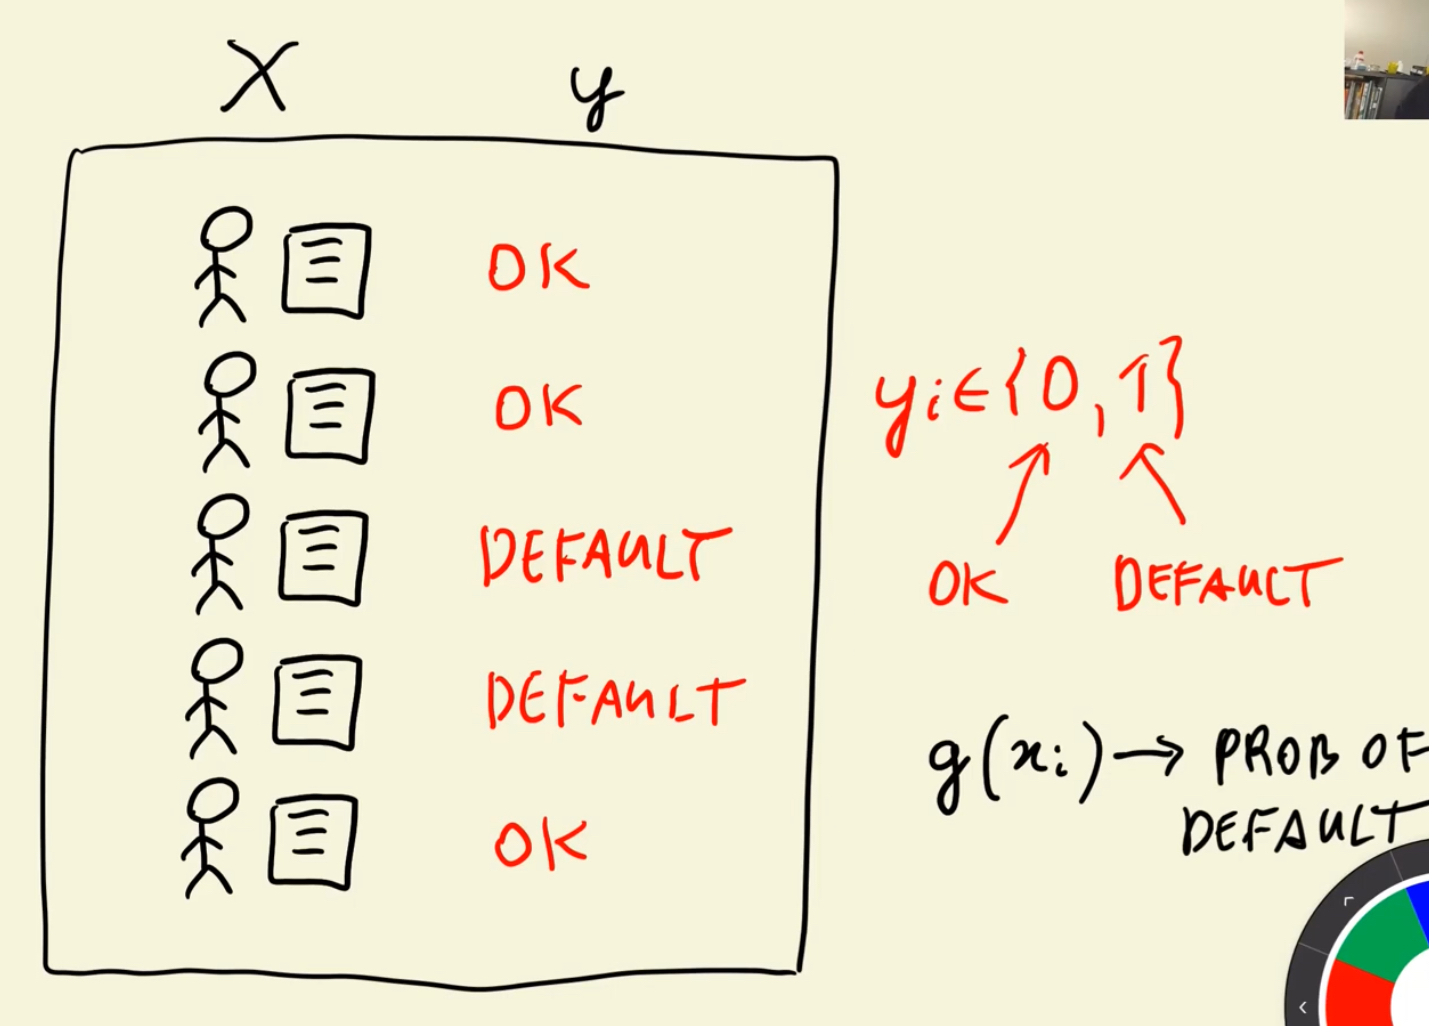 
</div>

### 6.2 Data clearning and preparation

- download the data set

In [9]:
import pandas as pd
import numpy as np

In [1]:
!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

--2022-10-15 11:23:48--  https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv [following]
--2022-10-15 11:23:48--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.04s   

2022-10-15 11:23:48 (4.12 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [79]:
df = pd.read_csv('CreditScoring.csv')

In [80]:
# convert columns names to lower case
df.columns = df.columns.str.lower()

In [81]:
# changing the format of status column
df.status = df.status.map(
    {
        1: 'ok', 
        2: 'default', 
        0: 'unk'}
)

In [82]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [83]:
df.head()

status  seniority  home  time  age  marital  records  job  expenses  \
0       ok          9     1    60   30        2        1    3        73   
1       ok         17     1    60   58        3        1    1        48   
2  default         10     2    36   46        2        2    3        90   
3       ok          0     1    60   24        1        1    1        63   
4       ok          0     1    36   26        1        1    1        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [84]:
# continue with the other colukns
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [85]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [86]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [87]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [88]:
df.head()

status  seniority   home  time  age  marital records        job  expenses  \
0       ok          9   rent    60   30  married      no  freelance        73   
1       ok         17   rent    60   58    widow      no      fixed        48   
2  default         10  owner    36   46  married     yes  freelance        90   
3       ok          0   rent    60   24   single      no      fixed        63   
4       ok          0   rent    36   26   single      no      fixed        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [89]:
df.describe().round()

seniority    time     age  expenses      income      assets  \
count     4455.0  4455.0  4455.0    4455.0      4455.0      4455.0   
mean         8.0    46.0    37.0      56.0    763317.0   1060341.0   
std          8.0    15.0    11.0      20.0   8703625.0  10217569.0   
min          0.0     6.0    18.0      35.0         0.0         0.0   
25%          2.0    36.0    28.0      35.0        80.0         0.0   
50%          5.0    48.0    36.0      51.0       120.0      3500.0   
75%         12.0    60.0    45.0      72.0       166.0      6000.0   
max         48.0    72.0    68.0     180.0  99999999.0  99999999.0   

             debt  amount    price  
count      4455.0  4455.0   4455.0  
mean     404382.0  1039.0   1463.0  
std     6344253.0   475.0    628.0  
min           0.0   100.0    105.0  
25%           0.0   700.0   1118.0  
50%           0.0  1000.0   1400.0  
75%           0.0  1300.0   1692.0  
max    99999999.0  5000.0  11140.0

99999999 indicate missing values. Replace it by NaN:

In [90]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [91]:
df.describe().round()

seniority    time     age  expenses  income    assets     debt  amount  \
count     4455.0  4455.0  4455.0    4455.0  4421.0    4408.0   4437.0  4455.0   
mean         8.0    46.0    37.0      56.0   131.0    5403.0    343.0  1039.0   
std          8.0    15.0    11.0      20.0    86.0   11573.0   1246.0   475.0   
min          0.0     6.0    18.0      35.0     0.0       0.0      0.0   100.0   
25%          2.0    36.0    28.0      35.0    80.0       0.0      0.0   700.0   
50%          5.0    48.0    36.0      51.0   120.0    3000.0      0.0  1000.0   
75%         12.0    60.0    45.0      72.0   165.0    6000.0      0.0  1300.0   
max         48.0    72.0    68.0     180.0   959.0  300000.0  30000.0  5000.0   

         price  
count   4455.0  
mean    1463.0  
std      628.0  
min      105.0  
25%     1118.0  
50%     1400.0  
75%     1692.0  
max    11140.0

Trget variable status
It's better to remove one status with 'unk' lable

In [92]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [93]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Prepare data for training:

-  train-validation-test split
- apply one-hot encoding to categorical features and get the feature matrix

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [96]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [97]:
df_train.status == 'default'

0        True
1        True
2       False
3        True
4       False
        ...  
2667    False
2668    False
2669    False
2670    False
2671    False
Name: status, Length: 2672, dtype: bool

In [103]:
y_train = (df_train.status == 'default').astype('int32').values
y_val = (df_val.status == 'default').astype('int32').values
y_test = (df_test.status == 'dafault').astype('int32').values

In [105]:
del df_train['status']
del df_val['status']
del df_test['status']

## 6.3 Decision trees
How decision tree looks like
<div>
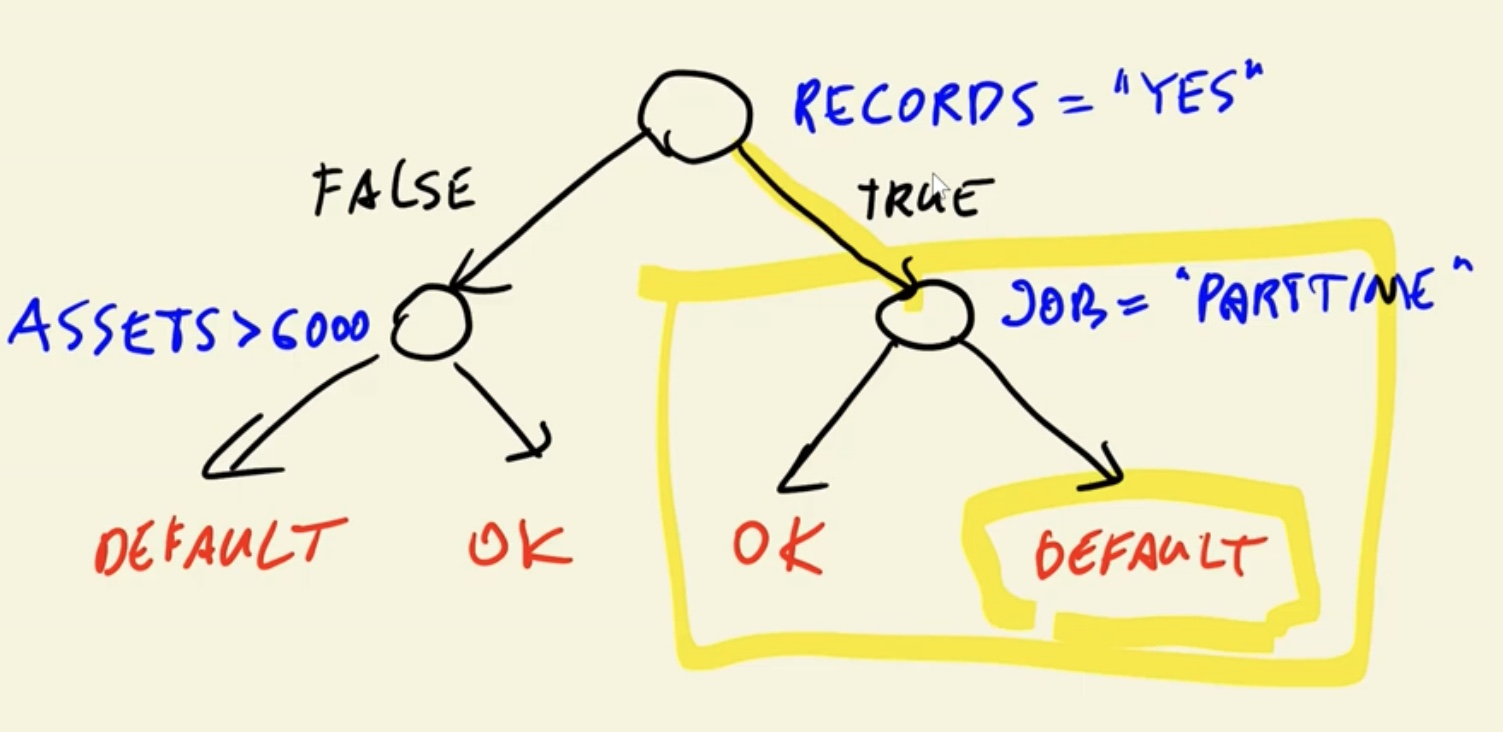
</div>

In [106]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'pattime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'dafault'

In [107]:
xi = df_train.iloc[0].to_dict()

In [108]:
assess_risk(xi)

'ok'

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [110]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [117]:
dv =  DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [112]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [114]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [115]:
roc_auc_score(y_val, y_pred)

0.6595686711389892

Overfitting problem - memorizing the data but failed generalize

<div>
    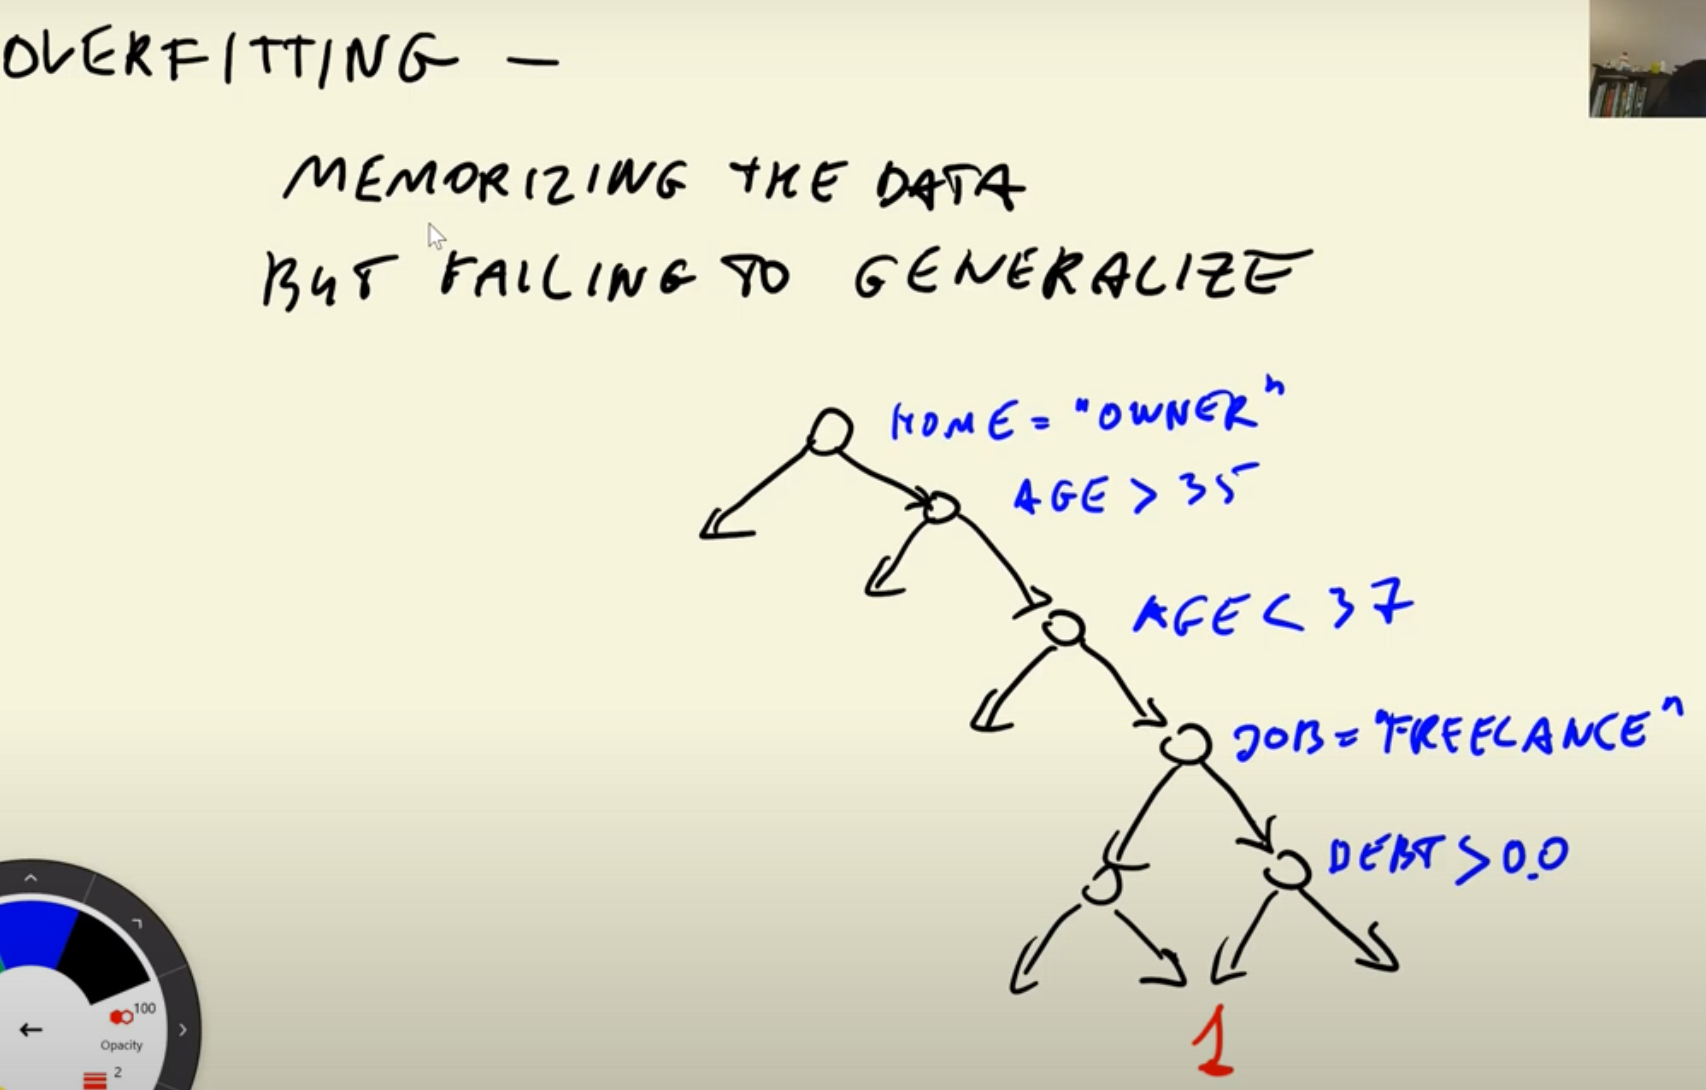
</div>
Also our tree it too deep, with this we let our tree to memorize the data.

In [122]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

If we limit the tree depth, 

In [123]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [125]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('training set: ', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation set: ', auc)

training set:  0.7761016984958594
validation set:  0.7389079944782155


Limit the depth to 1 to get the stamp

In [127]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('training set: ', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation set: ', auc)

training set:  0.6282660131823559
validation set:  0.6058644740984719


What is incide of function

In [128]:
from sklearn.tree import export_text

In [131]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- class: 1
|--- records=no >  0.50
|   |--- class: 0



The rule it learned is if record is 0, then class is 0
<div>
    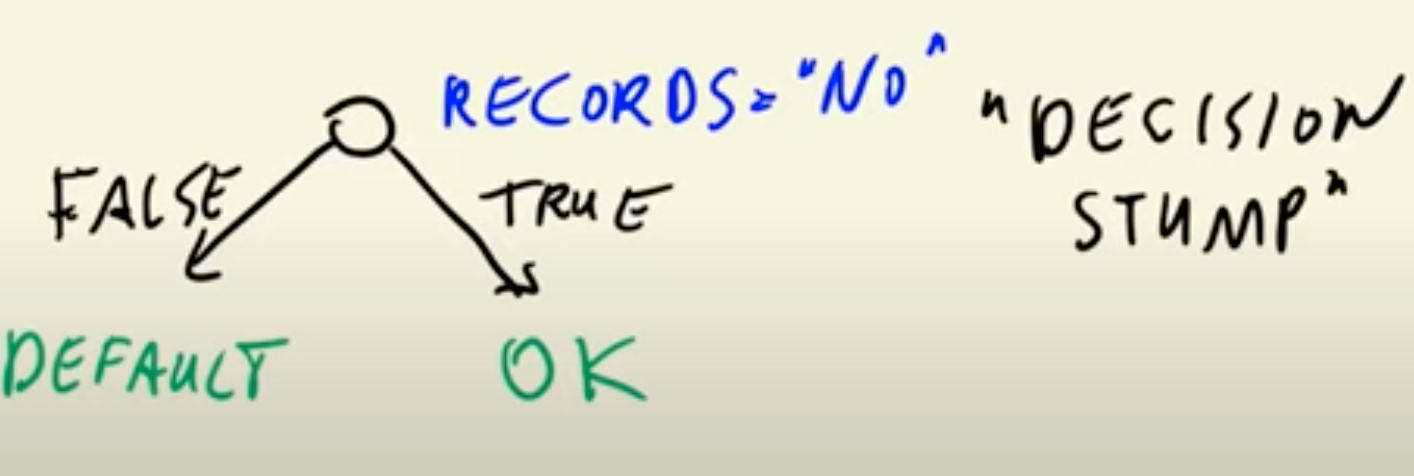
</div>

In [134]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('training set: ', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation set: ', auc)

training set:  0.7054989859726213
validation set:  0.6685264343319367


In [135]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



<div>
    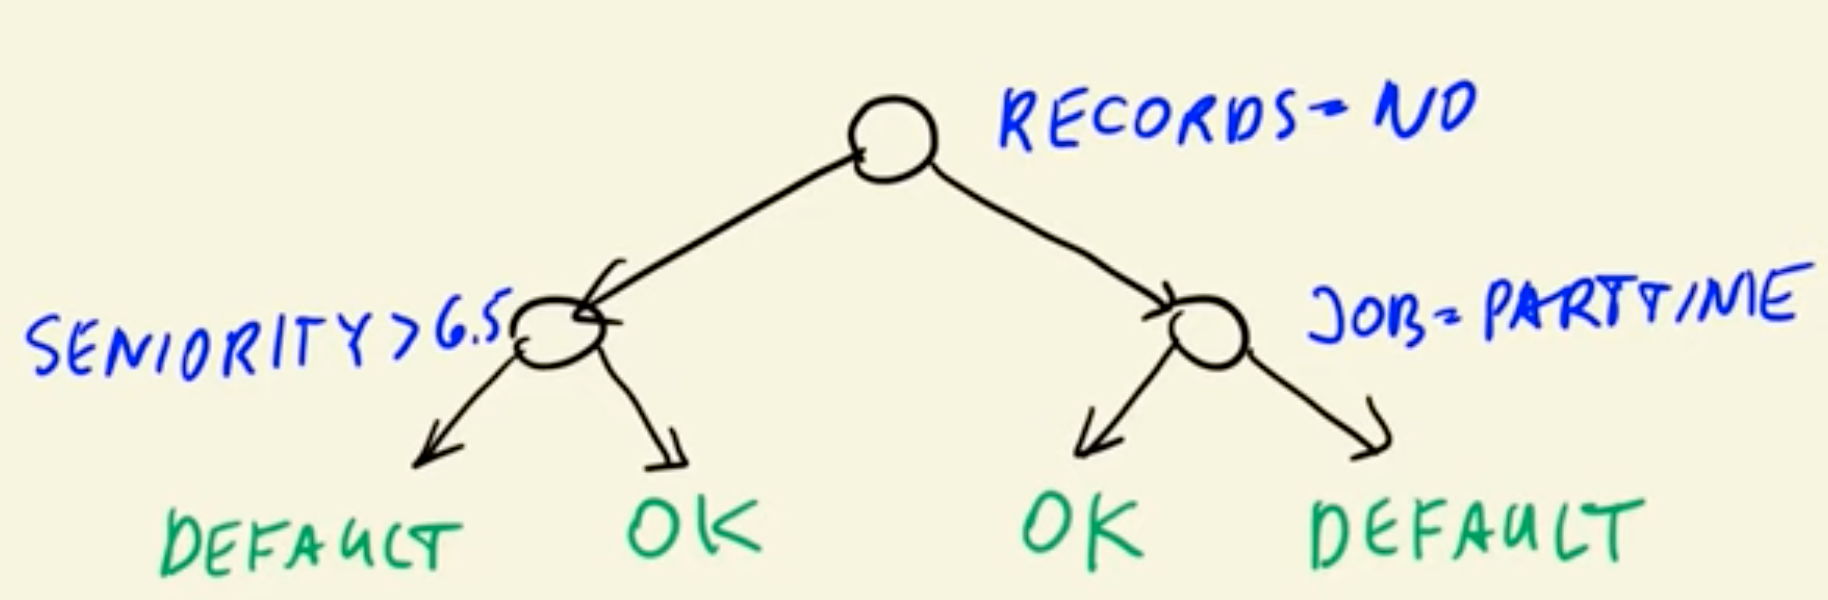
</div>

## 6.4. Decision tree learning algorithm

Finding the best split of entire dataset

In [141]:
data = [
    [8000, 'dafault'],
    [2000, 'dafault'],
    [0, 'dafault'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'dafault']
    ]
df_example = pd.DataFrame(data, columns = ['assets', 'status'])

In [142]:
Ts = [2000, 3000, 4000, 5000, 8000]

In [149]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left) 
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_left.status.value_counts(normalize=True))
    
    print()

2000


assets   status
1    2000  dafault
2       0  dafault

dafault    1.0
Name: status, dtype: float64


assets   status
0    8000  dafault
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  dafault

dafault    1.0
Name: status, dtype: float64

3000


assets   status
1    2000  dafault
2       0  dafault
7    3000  dafault

dafault    1.0
Name: status, dtype: float64


assets   status
0    8000  dafault
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok

dafault    1.0
Name: status, dtype: float64

4000


assets   status
1    2000  dafault
2       0  dafault
5    4000       ok
7    3000  dafault

dafault    0.75
ok         0.25
Name: status, dtype: float64


assets   status
0    8000  dafault
3    5000       ok
4    5000       ok
6    9000       ok

dafault    0.75
ok         0.25
Name: status, dtype: float64

5000


assets   status
1    2000  dafault
2       0  dafault
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  dafault

ok         0.5
dafault    0.5
Name: status, dtype: float64


assets   status
0    8000  dafault
6    9000       ok

ok         0.5
dafault    0.5
Name: status, dtype: float64

8000


assets   status
0    8000  dafault
1    2000  dafault
2       0  dafault
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  dafault

dafault    0.571429
ok         0.428571
Name: status, dtype: float64


assets status
6    9000     ok

dafault    0.571429
ok         0.428571
Name: status, dtype: float64



The best split can be identified by the calculation of AVG (impurity). The lowest AVG corresponds to the best split (T)
<div>
    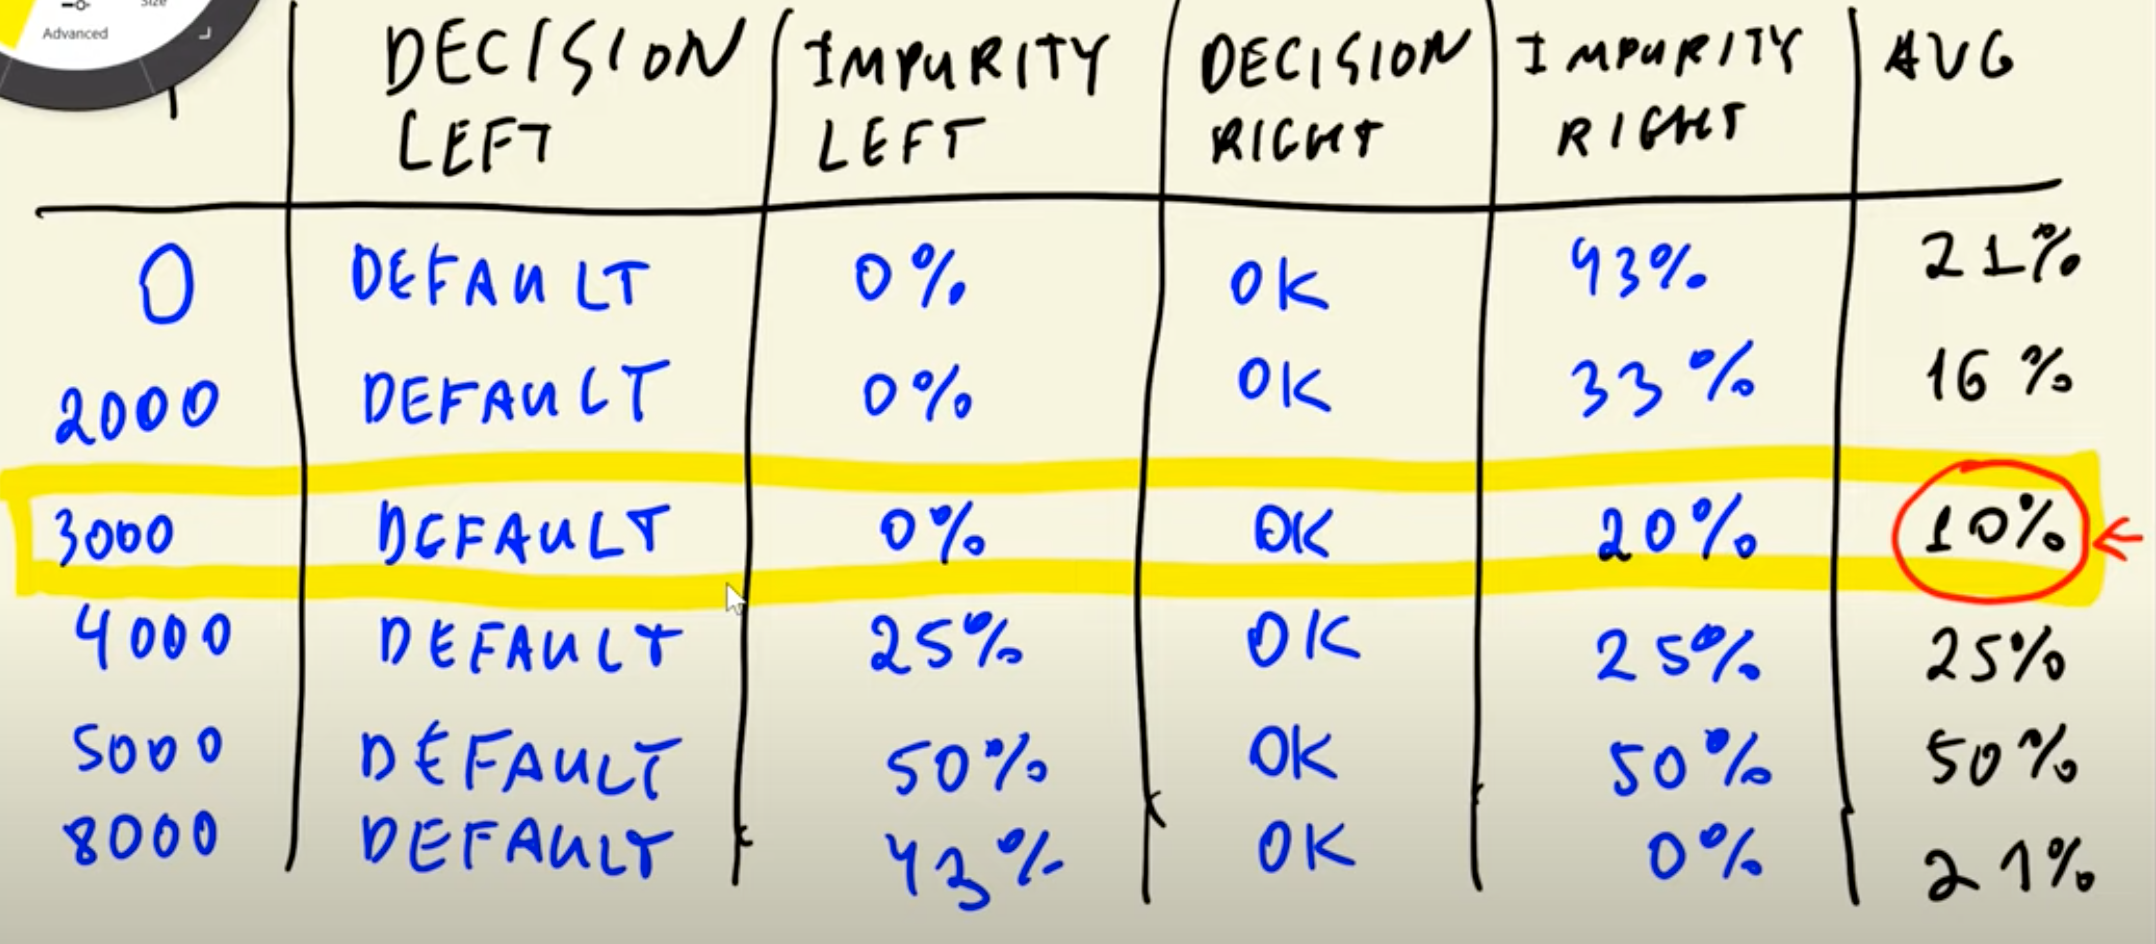
</div>

What if we have two features:

In [151]:
data = [
    [8000, 3000,'dafault'],
    [2000, 1000,'dafault'],
    [0, 1000,'dafault'],
    [5000, 1000, 'ok'],
    [5000, 1000,'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'dafault']
    ]
df_example = pd.DataFrame(data, columns = ['assets', 'debt', 'status'])
df_example

assets  debt   status
0    8000  3000  dafault
1    2000  1000  dafault
2       0  1000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  dafault

In [152]:
df_example.sort_values('debt')

assets  debt   status
6    9000   500       ok
1    2000  1000  dafault
2       0  1000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  dafault
0    8000  3000  dafault

In [154]:
tresholds = {
    'assets': [2000, 3000, 4000, 5000, 8000],
    'debt' : [500, 1000, 2000]
}


In [159]:
for feature, Ts in tresholds.items():
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left) 
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_left.status.value_counts(normalize=True))

        print()
    print('----------------')

assets
2000


assets  debt   status
1    2000  1000  dafault
2       0  1000  dafault

dafault    1.0
Name: status, dtype: float64


assets  debt   status
0    8000  3000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  dafault

dafault    1.0
Name: status, dtype: float64

3000


assets  debt   status
1    2000  1000  dafault
2       0  1000  dafault
7    3000  2000  dafault

dafault    1.0
Name: status, dtype: float64


assets  debt   status
0    8000  3000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok

dafault    1.0
Name: status, dtype: float64

4000


assets  debt   status
1    2000  1000  dafault
2       0  1000  dafault
5    4000  1000       ok
7    3000  2000  dafault

dafault    0.75
ok         0.25
Name: status, dtype: float64


assets  debt   status
0    8000  3000  dafault
3    5000  1000       ok
4    5000  1000       ok
6    9000   500       ok

dafault    0.75
ok         0.25
Name: status, dtype: float64

5000


assets  debt   status
1    2000  1000  dafault
2       0  1000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  dafault

ok         0.5
dafault    0.5
Name: status, dtype: float64


assets  debt   status
0    8000  3000  dafault
6    9000   500       ok

ok         0.5
dafault    0.5
Name: status, dtype: float64

8000


assets  debt   status
0    8000  3000  dafault
1    2000  1000  dafault
2       0  1000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  dafault

dafault    0.571429
ok         0.428571
Name: status, dtype: float64


assets  debt status
6    9000   500     ok

dafault    0.571429
ok         0.428571
Name: status, dtype: float64

----------------
debt
500


assets  debt status
6    9000   500     ok

ok    1.0
Name: status, dtype: float64


assets  debt   status
0    8000  3000  dafault
1    2000  1000  dafault
2       0  1000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
7    3000  2000  dafault

ok    1.0
Name: status, dtype: float64

1000


assets  debt   status
1    2000  1000  dafault
2       0  1000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok

ok         0.666667
dafault    0.333333
Name: status, dtype: float64


assets  debt   status
0    8000  3000  dafault
7    3000  2000  dafault

ok         0.666667
dafault    0.333333
Name: status, dtype: float64

2000


assets  debt   status
1    2000  1000  dafault
2       0  1000  dafault
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  dafault

ok         0.571429
dafault    0.428571
Name: status, dtype: float64


assets  debt   status
0    8000  3000  dafault

ok         0.571429
dafault    0.428571
Name: status, dtype: float64

----------------


<div><img src-"attachment:image.png"width="300"><>